<a href="https://colab.research.google.com/github/Paupau20/Colab/blob/main/Procesamiento_y_preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea de preprocesamiento y preparación de datos
#Maestro: Lázaro Bustio Martínez
#Paulina Martínez Vázquez
#ID: 226159-0

In [2]:
#Importamos todas las librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
from google.colab import files
from google.colab import drive
#Y montamos el drive para subir los archivos
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#Cargamos el archivo a usar
df = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/Tarea de preprocesamiento y preparación de datos/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# % of rows missing in each column
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


In [8]:
#drop column
df.drop('director', axis=1)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
#En vez de eliminar todas las columnas, eliminas las filas que tengan missing values
#drop row
no_director = df[df['director'].isnull()].index
df.drop(no_director, axis=0)
#~ + .isnull()
df[~df['director'].isnull()]
#dropna()
df.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
#Reemplazamos los valores faltantes con la media, de aquellos que se pueda
mode = ''.join(df['rating'].mode())
df['rating'].fillna(mode, inplace=True)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [15]:
#Rellenas los valores faltantes de duration con 0
df['duration'].fillna(0, inplace=True)

In [17]:
#creating column (extract)
df_movie = df[df['type']=='Movie']
df_movie = df_movie.assign(minute = pd.to_numeric(df_movie['duration'].fillna(0).str.extract(r'(\d+)', expand=False)))

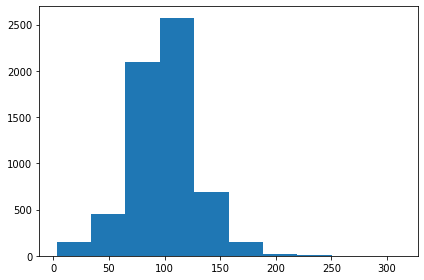

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

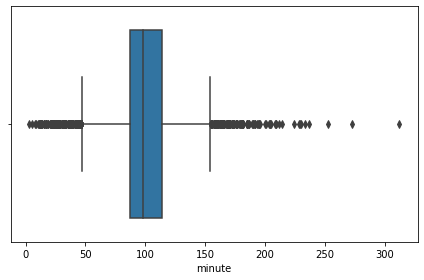

In [19]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

In [20]:
df_movie['minute'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [21]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)

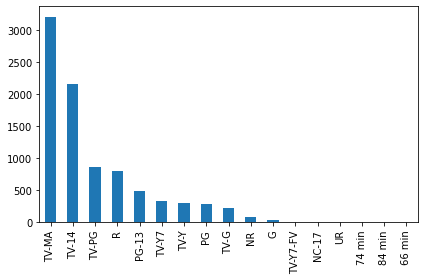

In [22]:
fig=df['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

In [24]:
#outliers
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

#The df_movie created now contains only movies that last between 43' and 158'.

In [25]:
df_netflix_originals = pd.read_csv('https://raw.githubusercontent.com/ifrankandrade/data_preprocessing/main/datasets/netflix_originals.csv')
df_netflix_originals.head()


,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix


In [28]:
#Cambiamos los títulos
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
df_netflix_originals.head()

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix


In [29]:
df_netflix_originals = df_netflix_originals.astype({"release_year": int})

In [33]:
!pip install fuzzywuzzy
from fuzzywuzzy import process, fuzz
states = ['New York', 'California', 'Washington', 'Hawaii']
df_states = pd.DataFrame({'states':['NY', 'CA', 'Washington DC', 'Hawai']})
df_states[['match', 'score']] = df_states['states'].apply(lambda x:process.extractOne(x, states, scorer=fuzz.token_sort_ratio)).apply(pd.Series)
df_states

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



,states,match,score
0,NY,New York,40
1,CA,California,33
2,Washington DC,Washington,87
3,Hawai,Hawaii,91


In [34]:
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.lower())
df_netflix_originals['title'] = df_netflix_originals['title'].str.lower()

In [35]:
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.strip())
df_netflix_originals['title'] = df_netflix_originals['title'].str.strip()

In [37]:
# remove punctuation: clean characters other than word or spaces
import re
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:re.sub('[^\w\s]','',x))
df_netflix_originals['title'].replace('[^\w\s]', '', regex=True, inplace=True)

In [39]:
df_netflix = pd.merge(df_netflix_originals, df, on=['title', 'type', 'release_year'],how='outer')
df_netflix['original'].fillna('Catalog', inplace=True)

In [40]:
df_netflix.head()

,title,release_year,genres,imdb,runtime,description_x,stars,votes,type,original,show_id,director,cast,country,date_added,rating,duration,listed_in,description_y
0,zumbos just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,you vs wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#drop_duplicates: data duplicated because of disagreement in releaase_year
df_netflix.drop_duplicates(['title'], keep='first', inplace=True)

In [42]:
df_netflix[['original', 'type']].value_counts()

original  type   
Catalog   Movie      6129
          TV Show    2674
Netflix   TV Show    1009
          Movie       504
dtype: int64